Diego

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from tools import get_roc_curve, print_classif_metrics, print_regress_metrics

# Metricas de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, r2_score, mean_absolute_error, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve

def get_roc_curve(y, y_pred, ax=None, **plt_kwargs):
    ''' 
    
    
    '''
# def get_roc_curve(y, y_pred, ax=None):
    if ax is None:
        ax = plt.gca()
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    ax.plot(fpr, tpr, **plt_kwargs)
    # ax.plot(fpr, tpr)
    ax.set(xlim = [0.0, 1.0],
           ylim = [0.0, 1.0],
           title = 'ROC curve for titanic classifier',
           xlabel = 'False Positive Rate (1 - Specificity)',
           ylabel = 'True Positive Rate (Sensitivity)',
        #    grid = True
    )
    return(ax)


def print_regress_metrics(y, y_pred):
    print("R^2 score:", round(r2_score(y_pred, y), 4))
    print("MAE score:", round(mean_absolute_error(y_pred, y), 4))
    print("MSE score:", round(mean_squared_error(y_pred, y), 4))
    print("RMSE score:", round(np.sqrt(mean_squared_error(y_pred, y)), 4))
    y_array, y_pred_array = np.array(y), np.array(y_pred)
    mape = np.mean(np.abs((y_array - y_pred_array) / y_array)) * 100
    print(f'MAPE score: {round(mape, 4)} %')


def print_classif_metrics(y, y_pred):
    print(f'Accuracy score: {round(accuracy_score(y_pred, y), 3)} %')
    print(f'Recall score: {round(recall_score(y_pred, y), 3)} %')
    print(f'Precision score: {round(precision_score(y_pred, y), 3)} %')
    print(f'F1 score: {round(f1_score(y_pred, y), 3)} %')
    print(f'AUC: {round(roc_auc_score(y_pred, y), 3)} %')

C:\Users\Silvia\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


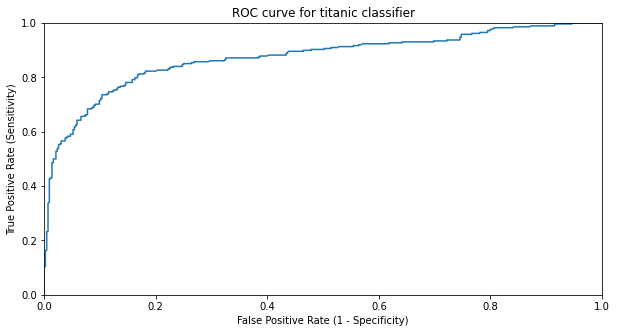

In [7]:
titanic_df = sns.load_dataset('titanic')

# Modelo rapido sin dividir en train/test ni ndada
titanic_df2 = titanic_df.drop(columns=['deck', 'alive']).copy()
titanic_df2 = titanic_df2.dropna()
titanic_df2 = pd.get_dummies(titanic_df2)

lr = LogisticRegression()
X = titanic_df2.iloc[:, 1:]
y = titanic_df2.iloc[:, 0]

lr.fit(X, y)
preds = lr.predict(X)

y_pred = lr.predict_proba(X)[:, 1]
plt.figure(figsize=(10, 5))
get_roc_curve(y, y_pred)
plt.show()

In [8]:
y_pred = lr.predict(X)
print_classif_metrics(y, y_pred)

Accuracy score: 0.823 %
Recall score: 0.796 %
Precision score: 0.757 %
F1 score: 0.776 %
AUC: 0.818 %


In [9]:
diamonds_df = sns.load_dataset('diamonds')

diamonds_df2 = pd.get_dummies(diamonds_df)

lr = LinearRegression()
X = diamonds_df2.drop(columns = ['price'])
y = diamonds_df2['price']

lr.fit(X, y)
y_pred = lr.predict(X)

print_regress_metrics(y, y_pred)

R^2 score: 0.9128
MAE score: 740.476
MSE score: 1276866.7661
RMSE score: 1129.9853
MAPE score: 39.1852 %


Antonio Campaña

In [10]:
def maps(latitude = 40.4167 , longitude = -3.70325, zoom = 6):
    '''Esta función muestra un mapa en función de la latitud, longitud y zoom introducidos.
    Por defecto mostrará España'''

    import folium
    from IPython.display import display
    
    center = [latitude, longitude]
    my_map = folium.Map(location=center, zoom_start=zoom)
    display(my_map)

Palma


In [11]:
import pandas as pd



def sort(df, col):
    '''This function sorts a DataFrame according to the selected column. 
    You only have to indicate the columns that you want to make up the dataframe.
    my_dict: dictionary
    df: Pandas DataFrame
    col = column
    '''
    df = df.sort_values(by=col,ascending=False)
    return df


Marta

In [ ]:
def boxplot(data, column, color, title, etiqueta_nombre_columna):
    '''
    This function makes a box plot for a specific column.
    
    data: dataframe
    column: column to be represented.
    color: color to be used.
    title: graph name.
    label_column_name: column to be graphed.
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns 
    plt.figure(figsize=(8,8))
    sns.boxplot(x=data[column], color=color)
    plt.title(title)
    plt.xlabel(etiqueta_nombre_columna)
    plt.show()

Juan

In [12]:
def pairplot_heatmap(df):
    
    '''
    Display function that plots a pairplot and a heatmap at the same time showing a pearson correlation at the top.

    Parameters: dataframe with numeric variables
    '''

    import matplotlib.pyplot as plt
    import seaborn as sns

    def codot(*args, **kwargs):
        corr_r = args[0].corr(args[1], 'pearson')
        corr_text = f"{corr_r:2.2f}".replace("0.", ".")
        ax = plt.gca()
        ax.set_axis_off()
        marker_size = abs(corr_r) * 10000
        ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
                   vmin=-1, vmax=1, transform=ax.transAxes)
        font_size = abs(corr_r) * 40 + 5
        ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                    ha='center', va='center', fontsize=font_size)

    g = sns.PairGrid(df, aspect=1.4, diag_sharey=False)
    g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
    g.map_diag(sns.distplot, kde_kws={'color': 'black'})
    g.map_upper(codot)

    return g

David

In [ ]:
def draw_sunburst(data_frame, path, color):
    '''This function performs a sunburst, when it is called, in 
    -"data_frame":the dataframe is entered,
    -"path": introduce with a list, the two columns or variables to be represented
    -"color": enter the column or main variable, which will be the value that the graph adopts'''
    import plotly.express as px
    fig = px.sunburst(
    data_frame = data_frame,
    path = path,
    color = color,
    color_discrete_sequence = ["red","green","blue","orange"],
    maxdepth = -1,
    )
    fig.update_traces(textinfo='label+percent entry')
    fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
    fig.show()

In [ ]:

def draw_circle(data, column, title):
    ''' This function performs a pie chart with the inner circle blank. When it is to be called
        -dataframe is entered in the "data" attribute,
        -column attribute: enter the column whose two values you want to represent, as a result, will give you the count '''
    import matplotlib.pyplot as plt
    total = data[column].value_counts()
    my_circle=plt.Circle( (0,0), 0.7, color='white') 
    plt.figure(figsize=(10,10))
    plt.pie(total.values,
            labels = total.index,
            autopct='%1.2f%%')
    p = plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(title)
    plt.show()

In [ ]:
def tres_countplot(data, column_ax0, column_ax1, column_ax2, column_hue0, column_hue1, column_hue2, title0, title1,
                     title2, palette1, palette2, palette3):
    '''This function performs three vertical countplot graphs with included legend, titles
    and labels with 45 degree rotation and color palette to choose from. When the function is called, the following must be done: 
    -data: the dataframe is entered,
    -column_ax0, column_ax1, column_ax2: you enter the columns or variables you want to represent
    -column_hue0, column_hue1, column_hue2: you enter the value you want to represent within the coutplot graphs, 
    -title0, title1, title2 are the titles of each subplot,
    -palette1, palette2 and palette3 are the color palettes for each subplot'''
    import matplotlib.pyplot as plt
    import seaborn as sns 
    fig, axes = plt.subplots(1, 3,  figsize=(20, 8))
    a = sns.countplot(data[column_ax0], hue=data[column_hue0], ax=axes[0], palette= palette1)
    axes[0].set_title(title0)
    a.set_xticklabels(a.get_xticklabels(), rotation=45)
    b = sns.countplot(data[column_ax1], hue=data[column_hue1], palette=palette2, ax=axes[1])
    axes[1].set_title(title1)
    b.set_xticklabels(b.get_xticklabels(), rotation=45)
    c = sns.countplot(data[column_ax2], hue=data[column_hue2], palette=palette3, ax=axes[2])
    axes[2].set_title(title2)
    c.set_xticklabels(c.get_xticklabels(), rotation=45)
    plt.show()